In [25]:
%matplotlib notebook
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.pipeline import Pipeline
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.base import TransformerMixin

In [2]:
os.chdir("C:\\Users\\Wojcz\\PycharmProjects\\scrapyta\\scrapyta\\tennis-atp-100-singles\\")
dataframe=pd.DataFrame()
for file in os.listdir():
	df=pd.read_csv("C:\\Users\\Wojcz\\PycharmProjects\\scrapyta\\scrapyta\\tennis-atp-100-singles\\{}".format(file),
		names=[i for i in range(400)],
		engine="python")
	dataframe=dataframe.append(df)
dataframe=dataframe.drop(labels=dataframe.columns[12:],axis=1)
dataframe=dataframe.drop_duplicates(0)
dataframe=dataframe.set_index(keys=pd.Index([i for i in range(dataframe.shape[0])]))
dataframe=dataframe.drop(labels=np.where(dataframe.iloc[:,11] == "-")[0][0],axis=0)
dataframe.iloc[:,11]=dataframe.iloc[:,11].astype(float)
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1168090971,Vilella M. M.,Andreozzi G.,13.09.2018 13:05,4.0,6.0,3.0,6.0,NaN,NaN,2.65,1.42
1,-803211511,Davidovich Fokina A.,Andreozzi G.,16.09.2018 12:10,4.0,6.0,6.0,4.0,3.0,6.0,2.32,1.55
2,-1535910362,Andreozzi G.,Cuevas M.,09.10.2018 17:10,6.0,7.0,6.0,2.0,6.0,3.0,1.37,2.85
3,-793910428,Andreozzi G.,Serdarusic N.,11.10.2018 16:10,6.0,7.0,4.0,6.0,NaN,NaN,1.27,3.40
4,-1226255578,Andreozzi G.,Dutra Da Silva R.,23.10.2018 17:40,4.0,6.0,6.0,1.0,1.0,0.0,1.60,2.19


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4013 entries, 0 to 4013
Data columns (total 12 columns):
0     4013 non-null int64
1     4013 non-null object
2     4013 non-null object
3     4013 non-null object
4     3979 non-null float64
5     3979 non-null float64
6     3942 non-null float64
7     3942 non-null float64
8     1443 non-null float64
9     1443 non-null float64
10    4013 non-null float64
11    4013 non-null float64
dtypes: float64(8), int64(1), object(3)
memory usage: 360.5+ KB


In [4]:
dataframe.describe()

,0,4,5,6,7,8,9,10,11
count,4.013000e+03,3979.000000,3979.000000,3942.000000,3942.000000,1443.000000,1443.000000,4013.000000,4013.000000
mean,-1.459353e+07,4.852224,4.802714,4.717656,4.738965,4.803881,4.760222,2.328799,2.361435
std,1.227007e+09,1.840764,1.880019,1.923080,1.890587,1.943997,1.988008,1.630239,1.575178
min,-2.146188e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.010000,1.010000
25%,-1.074805e+09,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.400000,1.430000
50%,-1.998499e+07,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.820000,1.860000
75%,1.033787e+09,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,2.610000,2.690000
max,2.147416e+09,7.000000,10.000000,7.000000,7.000000,11.000000,11.000000,25.000000,24.000000


In [5]:
dataframe=dataframe.dropna(axis=0,subset=[4,5,6,7])

In [6]:
second_set_more_gems = np.where(dataframe.iloc[:,[4,5]].sum(axis=1)
                                < dataframe.iloc[:,[6,7]].sum(axis=1),1,0)
lamak = np.where(((dataframe.iloc[:,4] > dataframe.iloc[:,5]) 
                 & (dataframe.iloc[:,7] > dataframe.iloc[:,6])) | 
                ((dataframe.iloc[:,4] < dataframe.iloc[:,5]) 
                 & (dataframe.iloc[:,7] < dataframe.iloc[:,6])),1,0)
three_sets = np.where(dataframe.iloc[:,8] == dataframe.iloc[:,8],1,0)
ssmg_high_odd = np.where(((dataframe.iloc[:,10] > dataframe.iloc[:,11]) & 
                         (dataframe.iloc[:,4] < dataframe.iloc[:,6])) | 
                        ((dataframe.iloc[:,10] < dataframe.iloc[:,11]) & 
                         (dataframe.iloc[:,5] < dataframe.iloc[:,7])),1,0)
ssmg_low_odd = np.where(((dataframe.iloc[:,10] > dataframe.iloc[:,11]) & 
                         (dataframe.iloc[:,5] < dataframe.iloc[:,7])) | 
                        ((dataframe.iloc[:,10] < dataframe.iloc[:,11]) & 
                         (dataframe.iloc[:,4] < dataframe.iloc[:,6])),1,0)
                        

print("TARGETS RATIO")
print("second_set_more_gems",np.unique(second_set_more_gems,return_counts=True)[1][1]
      /dataframe.shape[0])
print("lamak",np.unique(lamak,return_counts=True)[1][1]/dataframe.shape[0])
print("three_sets",np.unique(three_sets,return_counts=True)[1][1]/dataframe.shape[0])
print("ssmg_low_odd",np.unique(ssmg_low_odd,return_counts=True)[1][1]/dataframe.shape[0])
print("ssmg_high_odd",np.unique(ssmg_high_odd,return_counts=True)[1][1]/dataframe.shape[0])

TARGETS RATIO
second_set_more_gems 0.38102486047691525
lamak 0.332572298325723
three_sets 0.3660578386605784
ssmg_low_odd 0.2493658041603247
ssmg_high_odd 0.36732623033992895


<IPython.core.display.Javascript object>


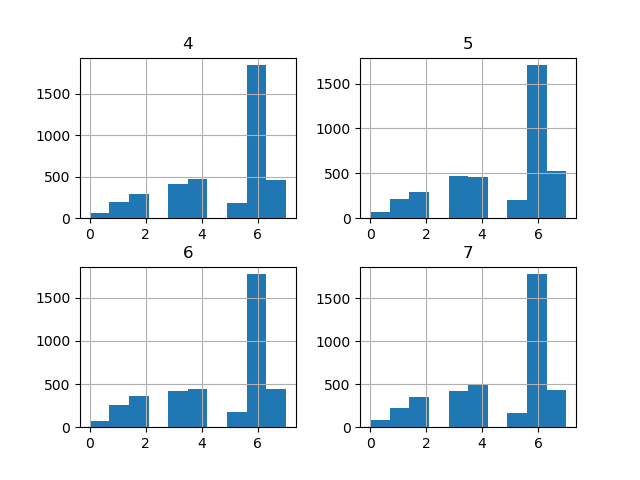

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0CCF6C50>,
      dtype=object)

In [7]:
dataframe.iloc[:,[4,5,6,7]].hist()

<IPython.core.display.Javascript object>


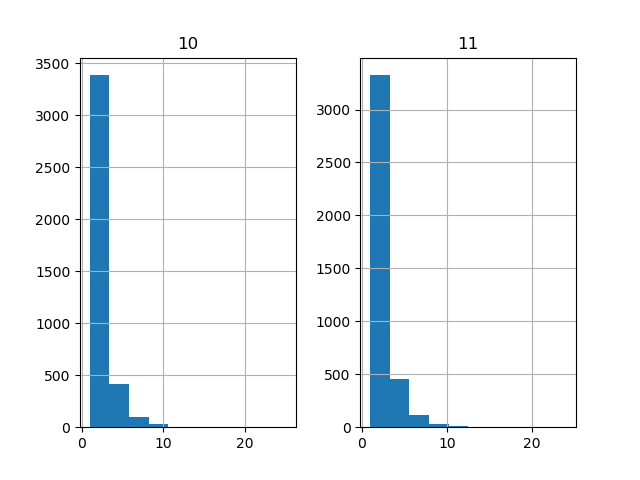

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0CE73250>,
      dtype=object)

In [8]:
dataframe.iloc[:,[10,11]].hist()

In [9]:
df=dataframe.iloc[:,[4,5,10,11]]
X_train,X_test,y_train,y_test=train_test_split(df,second_set_more_gems,test_size=0.25,
                                               stratify=second_set_more_gems)

In [10]:
test_tree=RandomForestClassifier(n_estimators=400)
test_tree.fit(X_train,y_train)
test_tree.feature_importances_

array([0.16512306, 0.17741657, 0.3300473 , 0.32741306])

In [11]:
sc=StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
test_pca = PCA()
test_pca.fit(X_train_std)
nvar = test_pca.explained_variance_ratio_
nvar = list(nvar)
nvar.sort(reverse=True)
for i in range(1,len(nvar)+1):
	print(sum(nvar[:i]))

0.5004887625691159
0.7141037470092559
0.872266274737859
1.0


<IPython.core.display.Javascript object>


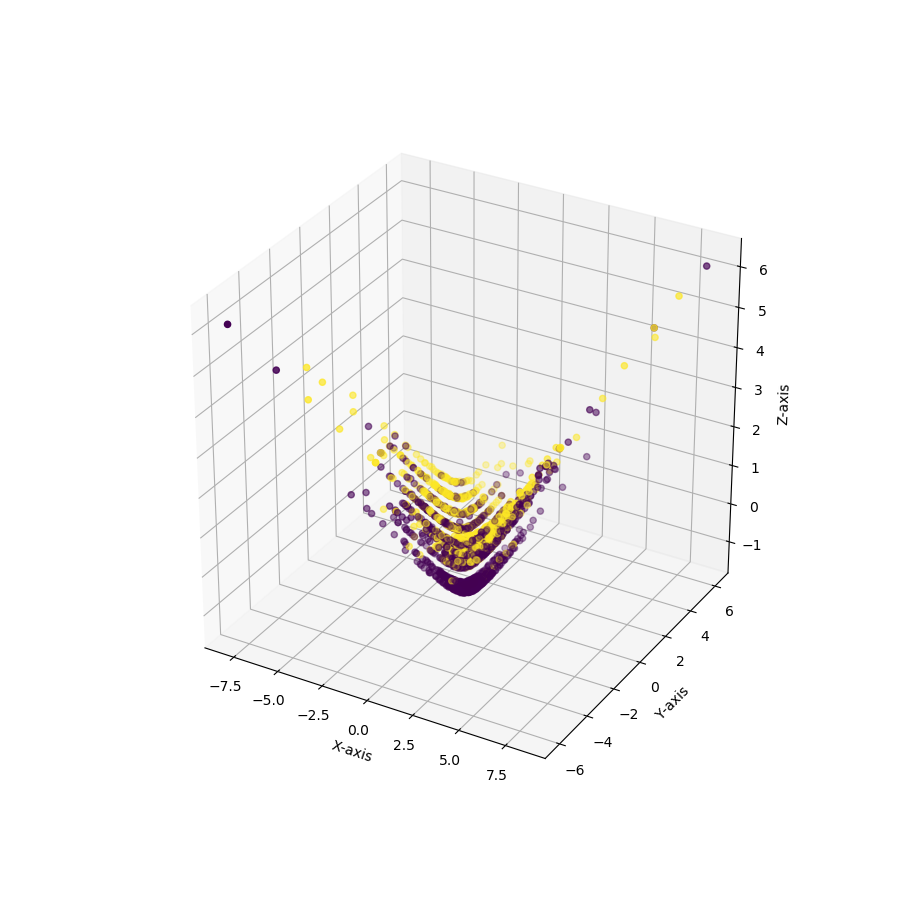

In [15]:
pca_3d = PCA(n_components=3,random_state=1)
X_train_std_pca3d = pca_3d.fit_transform(X_train_std)
X_test_std_pca3d = pca_3d.transform(X_test_std)

xplt = X_train_std_pca3d
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xplt[:,0],xplt[:,1],xplt[:,2],c=y_train)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

In [14]:
test_kpca = KernelPCA(kernel="rbf")
test_kpca.fit(X_train_std)
nvar1 = test_kpca.lambdas_
nvar1 = list(nvar1)
nvar1.sort(reverse=True)
test_kpca = KernelPCA(kernel="sigmoid")
test_kpca.fit(X_train_std)
nvar2 = test_kpca.lambdas_
nvar2 = list(nvar2)
nvar2.sort(reverse=True)
test_kpca = KernelPCA(kernel="poly")
test_kpca.fit(X_train_std)
nvar3 = test_kpca.lambdas_
nvar3 = list(nvar3)
nvar3.sort(reverse=True)
for i in range(1,20):
	print(sum(nvar1[:i]),'\t',sum(nvar2[:i]),'\t',sum(nvar3[:i]))

549.0677206713477 	 602.7578272810197 	 266526.1299177287
872.8115103161122 	 822.7923968485748 	 427809.22407406825
1073.0460506178872 	 962.6397627241624 	 435063.6214917429
1269.0684873634195 	 990.8324887234068 	 440555.61319787963
1369.583860455351 	 1015.2269682273696 	 443589.10624896974
1458.9317084110571 	 1025.454832907045 	 446091.50786587305
1531.607643274313 	 1035.1953450664494 	 448407.4243620973
1595.9539283768959 	 1042.442555844334 	 450091.5092625847
1640.8543095761675 	 1048.3996171411259 	 450764.93947049783
1678.7812326837256 	 1053.475875284589 	 451406.27903342125
1705.737293587015 	 1057.1553658341772 	 451943.6922065844
1729.6567010664885 	 1059.834098426513 	 452369.1574749377
1751.644641643434 	 1062.1131069112996 	 452688.9518424565
1770.7792994404176 	 1063.905642033434 	 452983.79069425934
1785.6120588185997 	 1065.469010098363 	 453212.42541206
1798.4283957378818 	 1066.8849445914707 	 453324.1159346901
1810.0907717895225 	 1068.2318508737962 	 453424.44

<IPython.core.display.Javascript object>


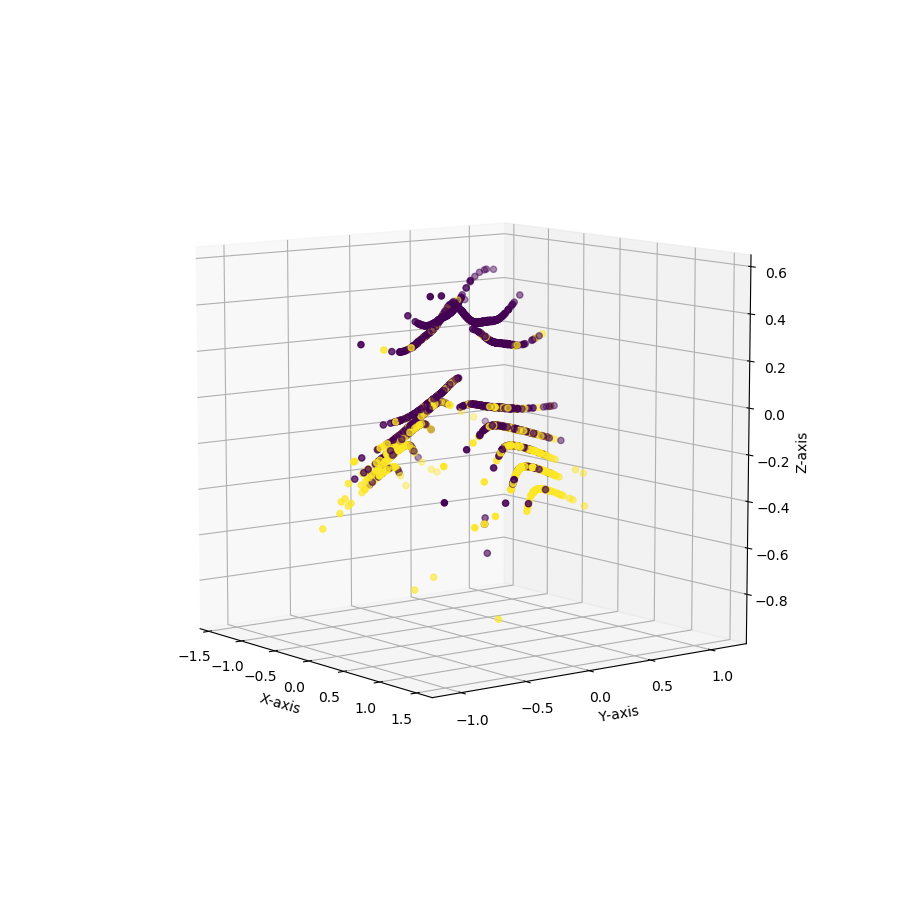

In [20]:
kpca_3d_sig = KernelPCA(kernel="sigmoid",n_components=3,random_state=2)
X_train_std_kpca3d = kpca_3d_sig.fit_transform(X_train_std)
X_test_std_kpca3d = kpca_3d_sig.transform(X_test_std)


xplt = X_train_std_kpca3d
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xplt[:,0],xplt[:,1],xplt[:,2],c=y_train)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

<IPython.core.display.Javascript object>


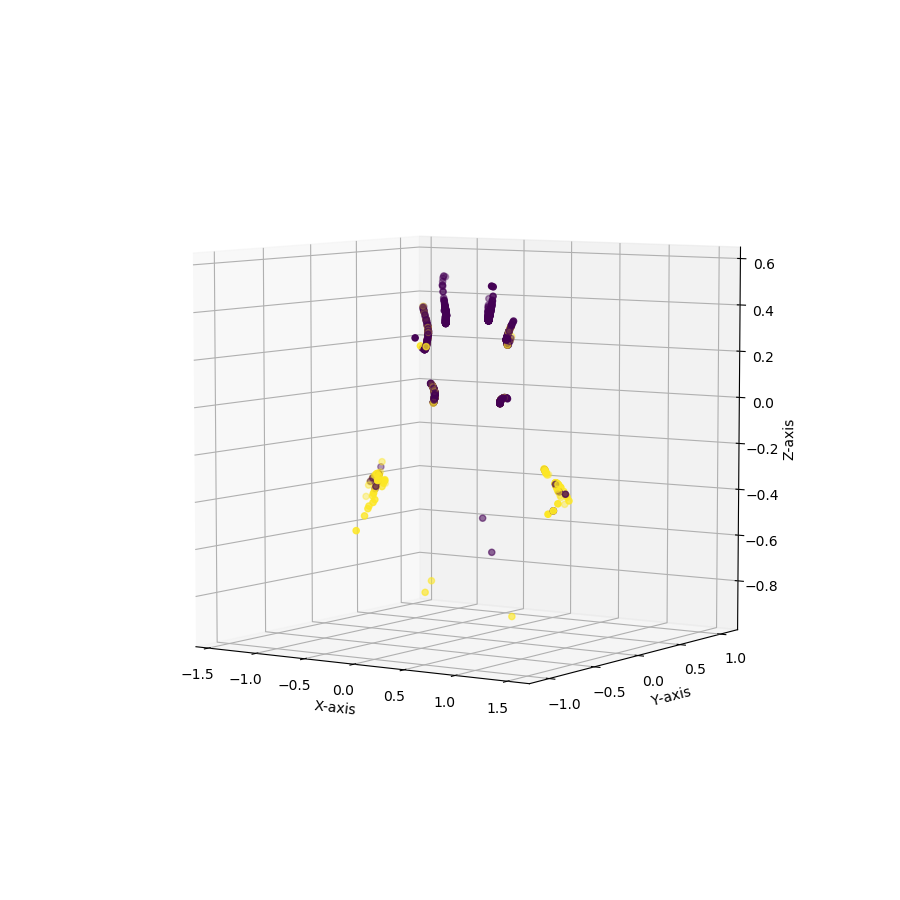

In [22]:
X_train_std_kpca3d = pd.DataFrame(X_train_std_kpca3d)
upper_part = X_train_std_kpca3d.iloc[:,2] > 0
bottom_part = X_train_std_kpca3d.iloc[:,2] < -0.3
X_train_std_kpca3d_filtered = X_train_std_kpca3d[upper_part | bottom_part]

y_train_filtered = pd.DataFrame(y_train)
y_train_filtered = y_train_filtered[upper_part | bottom_part]


xplt = X_train_std_kpca3d_filtered
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xplt.iloc[:,0],xplt.iloc[:,1],xplt.iloc[:,2],
           c=y_train_filtered.values.reshape(y_train_filtered.shape[0]))
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

In [24]:
paramgrid_svc_std=[{"kernel":["linear"],
"C":[0.001,0.01,1,4,10,50,100],
"gamma":[0.000001,0.00001,0.001]}
]


grid1_svc_std=GridSearchCV(SVC(max_iter=2000,probability=True),param_grid=paramgrid_svc_std,cv=10,n_jobs=2)
grid1_svc_std.fit(X_train_std_kpca3d_filtered,y_train_filtered)
print("BEST SCORE",grid1_svc_std.best_score_)
print("BEST PARAMS",grid1_svc_std.best_params_)

BEST SCORE 0.8876404494382022
BEST PARAMS {'C': 1, 'gamma': 1e-06, 'kernel': 'linear'}


c:\users\wojcz\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [197]:
class custom_filter(TransformerMixin):
    def __init__(self, *featurizers):
        self.featurizers = featurizers
    
    def fit_transform(self,*aa): 
        X ,y= aa[0]
        self.X = X.copy()
        self.y = y.copy()
        self.X = pd.DataFrame(self.X)
        self.y = pd.DataFrame(self.y)
        upper_part = self.X.iloc[:,2] > 0
        bottom_part = self.X.iloc[:,2] < -0.3
        self.X = self.X[upper_part | bottom_part]
        self.y = self.y[upper_part | bottom_part]
        self.fitted = True
        
        return self.X.values,self.y.values
    
    def transform(self,*aa): 
        X ,y= aa[0]
        return X,y
        
class wrapper(TransformerMixin):
    def __init__(self,transformer):
        self.transformer = transformer
    def fit_transform(self, *aa): 
        X ,y= aa[0]
        self.transformer.fit(X)
        return self.transformer.transform(X),y
    def transform(self,*aa):  
        X ,y= aa[0]
        return self.transformer.transform(X),y
    

class wrapper_clf(TransformerMixin):
    def __init__(self,clf):
        self.clf = clf
    def decision_function(self, *aa):
        X,y= aa[0]
        return self.clf.decision_function(X)
    def fit(self, *aa):
        X,y= aa[0]
        return self.clf.fit(X,y)
    def get_params(self,deep=True):
        return self.clf.get_params(deep)
    def predict(self, *aa):
        X,y= aa[0]
        return self.clf.predict(X)
    def predict_proba(self, *aa):
        X,y= aa[0]
        return self.clf.predict_proba(X)
    def score(self,*aa):
        X,y= aa[0]
        return self.clf.score(X,y)
    
        
pipe_std_sig_flrt = Pipeline([("sc",wrapper(StandardScaler())),
                            ("kpca",wrapper(KernelPCA(kernel="sigmoid",
                                                      n_components=3,random_state=2))),
                            ("custom_filter",custom_filter()),
                            ("clf",wrapper_clf(SVC(kernel="linear",
                                                   max_iter=2000,C=1,gamma=0.000001,
                                                  probability=True)))
                               ])
testy = pd.DataFrame(y_train)
testy = testy[upper_part | bottom_part]
testx = pd.DataFrame(X_train.values,index=[i for i in range(2956)])
testx = testx[upper_part | bottom_part]


#cross_val_score(pipe_std_sig_flrt,X_train,y_train,cv=10)
pipe_std_sig_flrt.fit((X_train,y_train))
pipe_std_sig_flrt.score((testx,testy))
# aaa = wrapper(StandardScaler())
# szege=aaa.fit_transform((X_train,y_train))
# bbb = wrapper(KernelPCA(kernel="sigmoid",n_components=3,random_state=2)) 
# bbb.fit_transform(szege)
# haha = custom_filter()
# uga=haha.fit_transform(bbb.fit_transform(szege))


# eee = wrapper_clf(SVC(max_iter=2000,C=1,gamma=0.000001))
# eee.fit(uga)

c:\users\wojcz\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8876404494382022

<IPython.core.display.Javascript object>


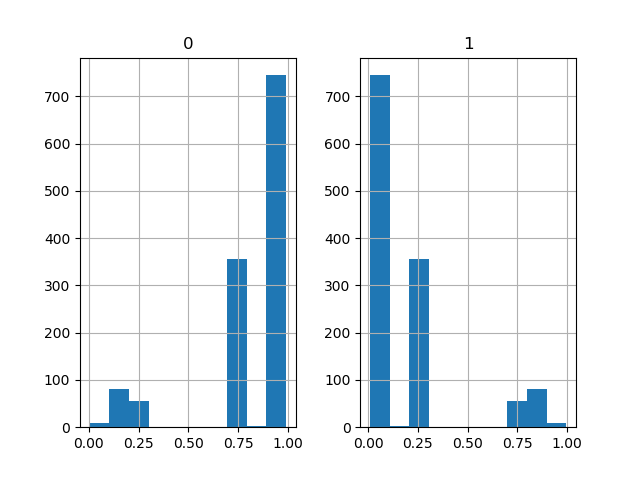

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0CAEF2F0>,
      dtype=object)

In [188]:
pd.DataFrame(pipe_std_sig_flrt.predict_proba((testx,testy))).hist()

<IPython.core.display.Javascript object>


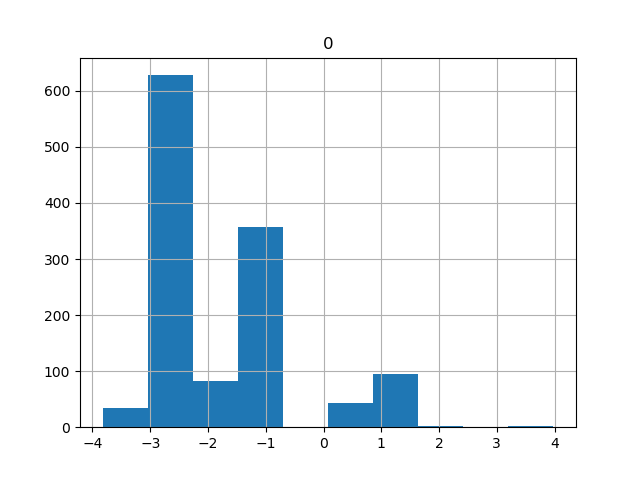

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127E9370>]],
      dtype=object)

In [189]:
pd.DataFrame(pipe_std_sig_flrt.decision_function((testx,testy))).hist()

<IPython.core.display.Javascript object>


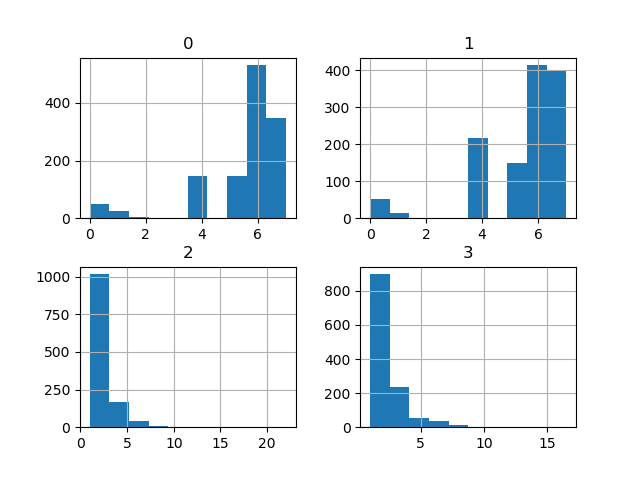

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1EA17CF0>,
      dtype=object)

In [191]:
testx.hist()


In [245]:
confusion_matrix(y_test,pipe_std_sig_flrt.predict((X_test,y_test)))

array([[549,  61],
       [217, 159]], dtype=int64)

<IPython.core.display.Javascript object>


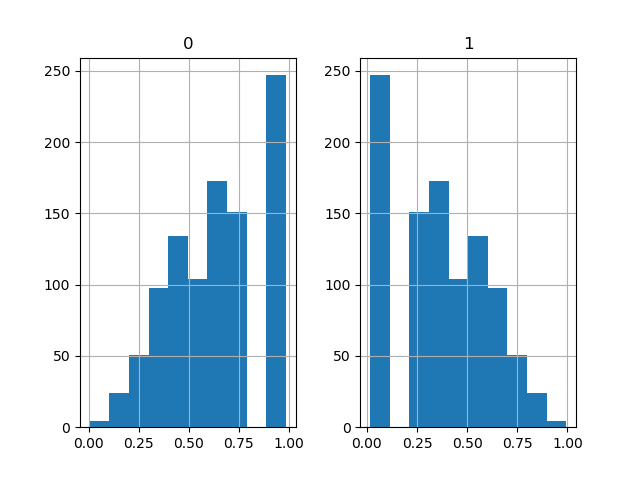

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12E4AC30>,
      dtype=object)

In [202]:
pd.DataFrame(pipe_std_sig_flrt.predict_proba((X_test,y_test))).hist()

In [247]:
high_proba = np.c_[y_test,pipe_std_sig_flrt.predict_proba((X_test,y_test))]
ff = np.where((high_proba[:,1] > 0.68) | (high_proba[:,2] > 0.68))
high_preds = np.where(high_proba[ff][:,1] > high_proba[ff][:,2],0,1)
high_proba[ff]
accuracy_score(y_test[ff],high_preds)

0.8723404255319149

In [251]:
from joblib import dump, load

path = "C:\\Users\\Wojcz\\gigaprojekt\\"
dump(pipe_std_sig_flrt, path + 'tennis_ssmg.joblib') 

['C:\\Users\\Wojcz\\gigaprojekt\\tennis_ssmg.joblib']